In [1]:
# Common imports
import numpy as np
import os


In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

In [3]:
# Let's define some transition probabilities, rewards and possible actions. For example, in state s0, if action a0 is 
# chosen then with proba 0.7 we will go to state s0 with reward +10, with probability 0.3 we will go to state s1 with 
# no reward, and with never go to state s2 (so the transition probabilities are [0.7, 0.3, 0.0], and the rewards 
# are [+10, 0, 0]):

In [3]:
transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
        [[0.0, 1.0, 0.0], None, [0.0, 0.0, 1.0]],
        [None, [0.8, 0.1, 0.1], None]]
rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], [0, 0, 0], [0, 0, 0]],
        [[0, 0, 0], [0, 0, 0], [0, 0, -50]],
        [[0, 0, 0], [+40, 0, 0], [0, 0, 0]]]
possible_actions = [[0, 1, 2], [0, 2], [1]]

In [4]:
# We will need to simulate an agent moving around in the environment, so let's define a function to perform 
# some action and get the new state and a reward:

def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

In [5]:
# We also need an exploration policy, which can be any policy, as long as it visits every possible state many times.
# We will just use a random policy, since the state space is very small:

def exploration_policy(state):
    return np.random.choice(possible_actions[state])


In [6]:
np.random.seed(42)

Q_values = np.full((3, 3), -np.inf)
for state, actions in enumerate(possible_actions):
    Q_values[state][actions] = 0

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] # Not shown in the book

for iteration in range(10000):
    history2.append(Q_values.copy()) # Not shown
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2) # Not shown

In [8]:
history2

array([[[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       [[ 0.        ,  0.        ,  0.        ],
        [ 0.        ,        -inf,  0.        ],
        [       -inf,  0.        ,        -inf]],

       ...,

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00727143],
        [       -inf, 49.39473808,        -inf]],

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00485647],
        [       -inf, 49.39473808,        -inf]],

       [[18.76824821, 17.2238872 , 13.74543343],
        [ 0.        ,        -inf, -8.00485647],
        [       -inf, 49.40208921,        -inf]]])

In [9]:
Q_values

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

In [10]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1], dtype=int64)

In [11]:
##############  Comparison with Q-Value iteration

In [12]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [13]:
gamma = 0.90  # the discount factor

history1 = [] # Not shown in the book (for the figure below)
for iteration in range(50):
    Q_prev = Q_values.copy()
    history1.append(Q_prev) # Not shown
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

history1 = np.array(history1) # Not shown

In [14]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [15]:
# Recommended policy So action0, S1 action 0, S2 action 1
np.argmax(Q_values, axis=1)

array([0, 0, 1], dtype=int64)

In [16]:
#  Using discount factor 0.95

Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [17]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [18]:
Q_values

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

In [19]:
np.argmax(Q_values, axis=1)

array([0, 2, 1], dtype=int64)

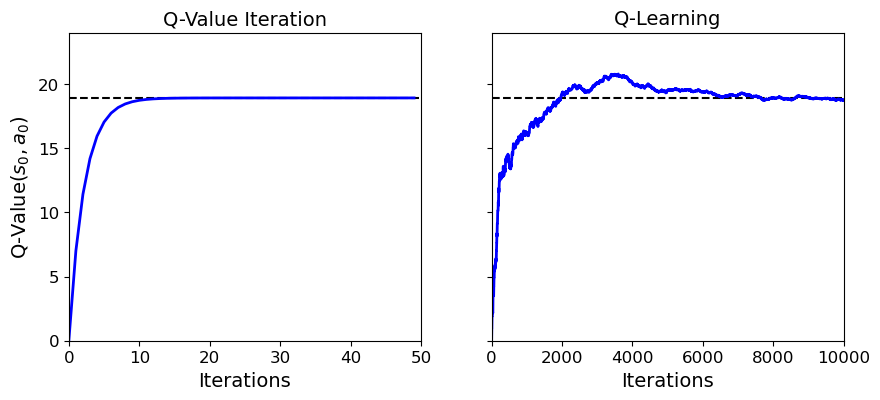

In [20]:
true_Q_value = history1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])



In [21]:
# Obviously, not knowing the transition probabilities or the rewards makes finding the
# optimal policy significantly harder!